#TP5: Perceptron simple et Multi couche 


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 

Lien Github:
https://github.com/BillTanekeu/TP-TPE-INF-3236-Groupe-8

representation d'un vecteur unidmentionnel avec numpy


#NEURAL NEWORKS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


transposition de notre vecteur en un vecteur colonne

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


initialisation des poids de matrices:avec numpy.ramdom  la valeur des matrices est choisis aleatoirement pour que le choix soit le meilleur possible

In [ ]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))


True


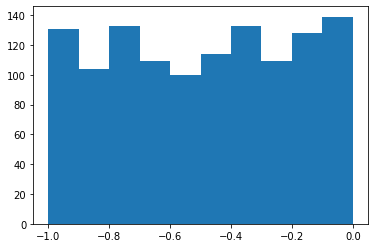

In [ ]:
#histogramme  des echantillons
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

maintenant appliquons la fonction binomiale de numpy.binomial
il tire des echantillons d'une distribution avec 100 essais et une probabilite de 0.5 de succes 

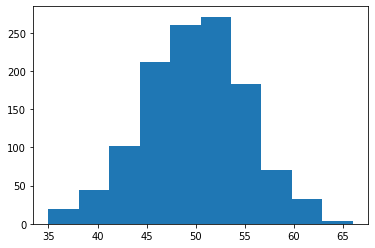

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()


le defaut avec notre histogramme est que nous n'avons pas de nombres aleatoires avec une distribution normale bornes avec numpy.random ; pour palier a cela nous allons utiliser scipy.stats

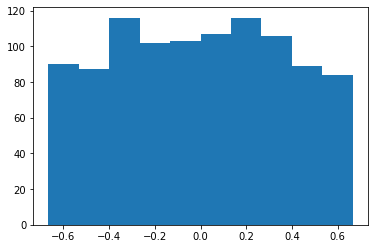

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()


on remarque que scipy.stats est difficil a utiliser on utilise alors la fonction truncated_normal

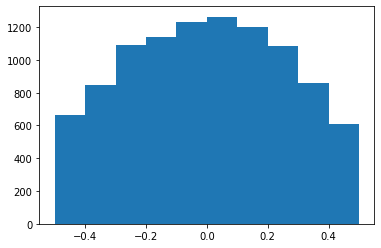

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
(low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

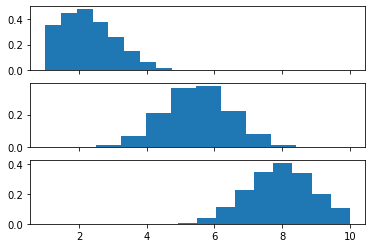

In [ ]:
#autre methodes 
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()


maintenant on cree la matrice de poids des liens  avec truncates_normal a valeur alatoire

In [ ]:
#creation de la matrice "wih"

no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.32839788,  0.22690489,  0.53249265],
       [-0.21123978,  0.35873692,  0.32594956],
       [ 0.51256671, -0.04465704, -0.37952503],
       [ 0.5196379 , -0.16937807,  0.13069145]])

In [ ]:
# matrice de poids "who"
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.30028379,  0.17626455,  0.48870891, -0.23847917],
       [ 0.19792769, -0.04621087, -0.46679605,  0.30037489]])

testons nos poids dans un environnement de reseau  neuronal reel

In [ ]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
      (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,
               no_of_in_nodes,
               no_of_out_nodes,
               no_of_hidden_nodes,
               learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                    self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                  self.no_of_hidden_nodes))
  def train(self):
   pass
  def run(self):
    pass
 

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,no_of_out_nodes = 2,
no_of_hidden_nodes = 4,
learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)


[[-0.065527   -0.2139082  -0.30019509]
 [ 0.5096193   0.41776769  0.12907276]
 [ 0.00854035 -0.45934631  0.20262027]
 [-0.22902852  0.35986155  0.51219087]]
[[ 0.02360438  0.10211493 -0.37087907  0.47848704]
 [ 0.39077069  0.38214222  0.3689508   0.0594335 ]]


fonction d'activation sigmoide avec numpy 

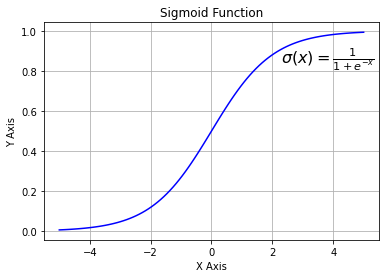

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

 on vois  que la fonction sigmoïde mappe un nombre donné x dans la plage de nombres entre 
0 et 1. aussi au fure et a  mesure que la valeur de x augmente, la valeur de la fonction sigmoïde se rapproche de plus en plus de 
1 et à mesure que x diminue, la valeur de la fonction sigmoïde se rapproche de 0


In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


expit importé à partir scipy.special est une version implémentée de la fonction sigmoide qui s'applique aux entiers , réels , tableaux numpy et autres...

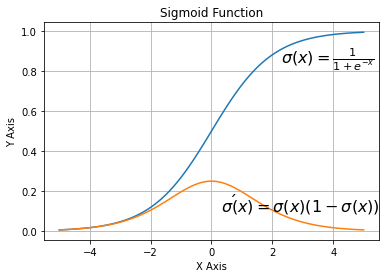

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()

Traacé de la fontion sigmoide et de sa dérivée dans le même repère.

In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

définition de la fonction sigmoide sous la forme vectorisée et calcul des images de quelques réels par cette dernière

In [ ]:
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

Définition d'un autre type de fonction d'activation: la fonction RELU.
cette fonction pour un entier x donné renvoit le maximum entre ce x et 0 , ce qui signifie que lorsque x est négatif ou égal à zéro , relu(x)=0 et relu(x)=x sinon

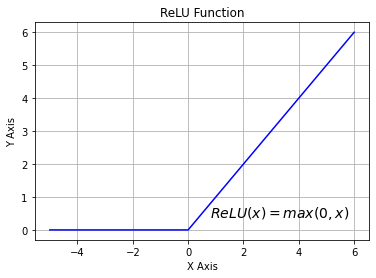

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

courbe de la fonction relu sur l'intervalle [-5,6]

In [ ]:
from scipy.special import expit as activation_function   # importation de la fonction d'activation scipy sous le nom  activation_function
import numpy as np
from scipy.stats import truncnorm

In [ ]:

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        pass
    def run(self, input_vector):
# turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

création d'un réseau de neurones prenant en entrée une matrice dont les activations successives au niveau de la couche intermédiaire et de la couche de sortie se feront grace à notre fonction scipy renommée précédemment en activation_function

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=2,no_of_hidden_nodes=4,learning_rate=0.6)
simple_network.run([(3, 4)])

array([[0.36666721],
       [0.42705733]])

définition de notre fonction de réseaux avec deux neurones dans la couche d'entrée, de aussi dans la couche de sortie et 4 dans la couche intermédiaire. 
Evaluation avec le vecteur [(3, 4)] en entrée et 0.6 comme taux d'apprentissage.

In [39]:

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):    # fonction pour notre réseau de neurones
        self.no_of_in_nodes = no_of_in_nodes  # nombre de neurones dans la couche d'entrée
        self.no_of_out_nodes = no_of_out_nodes # définition du nombre de neurones dans la couche de sortie
        self.no_of_hidden_nodes = no_of_hidden_nodes      # nombres de neurones de la couche intermédiaire
        self.learning_rate = learning_rate    # définition du taux d'apprentissage
        self.create_weight_matrices()    # création d'une matrice pour ces éléments 
   
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
   
    def train(self, input_vector, target_vector):
        pass
    
    def run(self, input_vector):
# turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T    # transformation de nos entrées en vecteur colonne
        input_hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector
        # run permet pour un vecteur d'entrées de donner la sortie en utilisant à chaque niveau l'activation scipy
   
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
      # évaluation du modèle. la sortie voulue est comparée à l sortie du modèle qui est en faite le noeud de sortie ayant la plus grande valeur

Définition du même réseau de neurone précedent, accompagné cette fois d'une fonction d'évaluation

In [32]:
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,centers=blob_centers,random_state=7)

utilisations du jeu de données make blobs de sklearn pour tester notre réseau de neurones

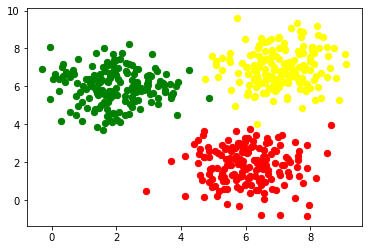

In [33]:
import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0],
    data[labels==n_class][:, 1],c=colours[n_class],s=40,label=str(n_class))

définition de trois classes de couleurs différentes pour nos données

In [21]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

Etiquettes des 7 premières données, en effet elles sont mal présentées

In [34]:
import numpy as np
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Dèsormais les étiquettes sont représentées sous la forme d'un vecteur de trois entrées correspondants aux trois classes , de sorte à ce qu'on ait 1 au niveau de la classe correspondante à notre donnée et 0 sur les autres

In [36]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

importation de la méthode train_test_split pour la division de notre ensemble de données en deux: 80% pour entraînement et 20% pour le test

In [37]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3,no_of_hidden_nodes=5,learning_rate=0.3)

In [48]:
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(270, 130)

Evaluation des données de train sur notre modèle de réseau de neurones

In [28]:
import numpy as np
from scipy.stats import truncnorm
from scipy.special import expit as activation_function
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [42]:
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()

    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
        self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes+ bias_node))

    def train(self, input_vector, target_vector):
# make sure that the vectors have the right shap
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,1)
        if self.bias:
       # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [[self.bias]]) )
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
            output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
            output_error = target_vector - output_vector_network
# update the weights:
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
# calculate hidden errors:
            hidden_errors = self.weights_hidden_out.T @ output_error
# update the weights:
            tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
            if self.bias:
                x = (tmp @input_vector.T)[:-1,:] # last row cut off,
            else:
                x = tmp @ input_vector.T
                self.weights_in_hidden += self.learning_rate * x
    
    def run(self, input_vector):
# make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
# adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [[1]]) )
        input4hidden = activation_function(self.weights_in_hidden@ input_vector)
        if self.bias:
            input4hidden = np.concatenate( (input4hidden, [[1]]) )
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

Définition semblable du réseau de neurones précédents mais cette fois on ajoute un biais

In [44]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3,no_of_hidden_nodes=5,learning_rate=0.1,bias=1)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(270, 130)

Evaluation de notre modèle avec biais sur le data set de make blobs